In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [183]:
df=pd.read_csv("coaster_db.csv")

In [185]:
df

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN,...,53 mph,85 km/h,53.0,mph,53.0,111.0,ft,NaN,3,4.7
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,2022,Steel – Launched,Intamin,NaN,Blitz Coaster,...,73 mph,117 km/h,73.0,mph,73.0,178.0,ft,NaN,2,NaN
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,"June 16, 2016",Steel – Launched,Vekoma,4[2] ft (122 cm),Motorbike roller coaster,...,59.3 mph,95.4 km/h,59.3,mph,59.3,78.1,ft,NaN,0,4.0
1085,Tumbili,770 ft (230 m),34 mph (55 km/h),Kings Dominion,Under construction,NaN,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,NaN,4D Free Spin,...,34 mph,55 km/h,34.0,mph,34.0,112.0,ft,NaN,0,NaN


In [77]:
df.shape

(1087,)

In [79]:
df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1087 entries, 0 to 1086
Series name: opening_date_clean
Non-Null Count  Dtype         
--------------  -----         
837 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.6 KB


In [81]:
df.head()

0   1884-06-16
1   1895-01-01
2          NaT
3   1901-01-01
4   1901-01-01
Name: opening_date_clean, dtype: datetime64[ns]

In [83]:
df.tail()

1082          NaT
1083   2022-01-01
1084   2016-06-16
1085          NaT
1086   2022-01-01
Name: opening_date_clean, dtype: datetime64[ns]

In [342]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Opened',
       'year_introduced', 'latitude', 'longitude', 'Type_Main', 'opening_date',
       'Speed_mph', 'Height_ft', 'Inversions', 'Gforce'],
      dtype='object')

In [87]:
df.describe()

count                              837
mean     1994-07-25 07:06:39.999999872
min                1884-06-16 00:00:00
25%                1987-06-07 00:00:00
50%                2000-04-22 00:00:00
75%                2010-11-04 00:00:00
max                2022-03-01 00:00:00
Name: opening_date_clean, dtype: object

In [189]:
# example of dropping the columns 
df.drop(['Status'],axis=1)

,coaster_name,Location,Manufacturer,Opened,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,LaMarcus Adna Thompson,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Lina Beecher,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",NaN,1895,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Edwin Prescott,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Edwin Prescott,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,Anton Schwarzkopf,NaN,2022,NaN,NaN,Steel,NaN,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Intamin,NaN,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,Vekoma,NaN,2022,NaN,NaN,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,S&S – Sansei Technologies,NaN,2022,NaN,NaN,Steel,NaN,34.0,NaN,0,NaN


In [187]:
df=df[['coaster_name', 
    #'Length', 'Speed', 
    'Location', 'Status', 
    #'Opening date','Type', 
    'Manufacturer', 
    #'Height restriction', 'Model', 'Height','Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section','Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    #'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
    # 'Track layout', 'Fastrack available', 'Soft opening date.1',
    #  'Closing date', 
    'Opened', 
    #'Replaced by', 'Website',
    #   'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
    #   'Single rider line available', 'Restraint Style',
    #   'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 
    #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    #'height_value', 'height_unit', 
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()
df

,coaster_name,Location,Status,Manufacturer,Opened,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1895,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,NaN,2022,NaN,NaN,Steel,NaN,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,NaN,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,Vekoma,NaN,2022,NaN,NaN,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,NaN,2022,NaN,NaN,Steel,NaN,34.0,NaN,0,NaN


In [191]:
df.shape

(1087, 14)

In [193]:
df['opening_date_clean']=pd.to_datetime(df['opening_date_clean'])

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   coaster_name        1087 non-null   object        
 1   Location            1087 non-null   object        
 2   Status              874 non-null    object        
 3   Manufacturer        1028 non-null   object        
 4   Opened              27 non-null     object        
 5   year_introduced     1087 non-null   int64         
 6   latitude            812 non-null    float64       
 7   longitude           812 non-null    float64       
 8   Type_Main           1087 non-null   object        
 9   opening_date_clean  837 non-null    datetime64[ns]
 10  speed_mph           937 non-null    float64       
 11  height_ft           171 non-null    float64       
 12  Inversions_clean    1087 non-null   int64         
 13  Gforce_clean        362 non-null    float64     

In [197]:
df

,coaster_name,Location,Status,Manufacturer,Opened,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1895,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,NaN,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,NaN,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,Vekoma,NaN,2022,NaN,NaN,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,NaN,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [199]:
df.rename(columns={
    'coaster_name':'Coaster_Name',
    'opening_date_clean':'opening_date',
    'Inversions_clean':'Inversions',
    'Gforce_clean':'Gforce' ,
    'speed_mph':'Speed_mph',
    'height_ft':'Height_ft'
},inplace=True)

In [139]:
df

,Coaster_Name,Location,Status,Manufacturer,Opened,year_introduced,latitude,longitude,Type_Main,opening_date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1895,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,NaN,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,NaN,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,Vekoma,NaN,2022,NaN,NaN,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,NaN,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [129]:
df.isna().sum()

Coaster_Name          0
Location              0
Status              213
Manufacturer         59
Opened             1060
year_introduced       0
latitude            275
longitude           275
Type_Main             0
opening_date        250
Speed_mph           150
Height_ft           916
Inversions            0
Gforce              725
dtype: int64

In [201]:
df.loc[df.duplicated('Coaster_Name')].head()

,Coaster_Name,Location,Status,Manufacturer,Opened,year_introduced,latitude,longitude,Type_Main,opening_date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,NaN,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,NaN,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,NaN,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,NaN,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [203]:
df[df['Coaster_Name']=='Crystal Beach Cyclone']

,Coaster_Name,Location,Status,Manufacturer,Opened,year_introduced,latitude,longitude,Type_Main,opening_date,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,NaN,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,NaN,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [209]:
df=df.loc[~df.duplicated(['Coaster_Name','Location','opening_date'])].reset_index(drop=True).copy()

In [211]:
df

,Coaster_Name,Location,Status,Manufacturer,Opened,year_introduced,latitude,longitude,Type_Main,opening_date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1895,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,NaN,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,NaN,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,NaN,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,NaN,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [213]:
#Univariate Analysis

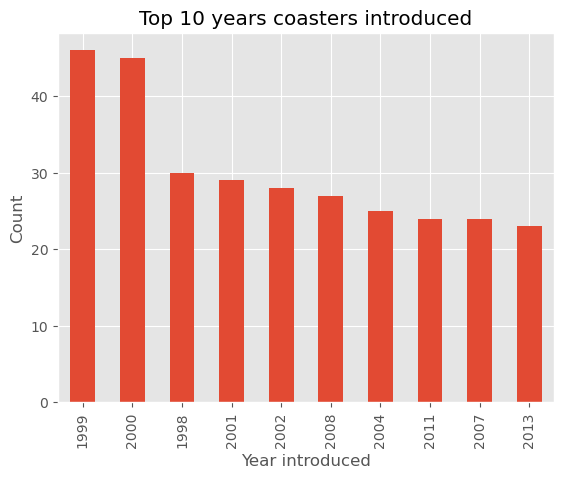

In [233]:
df['year_introduced'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 years coasters introduced')
plt.xlabel('Year introduced')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='Frequency'>

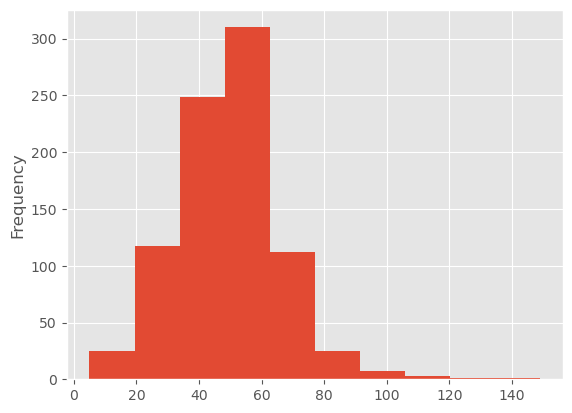

In [237]:
df['Speed_mph'].plot(kind='hist')

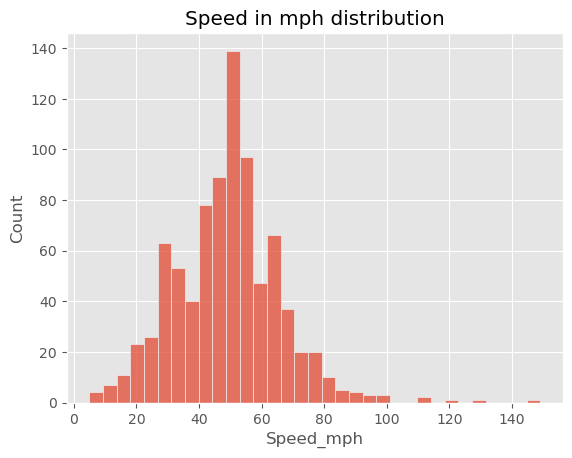

In [243]:
sns.histplot(df['Speed_mph'])
plt.title('Speed in mph distribution')
plt.show()

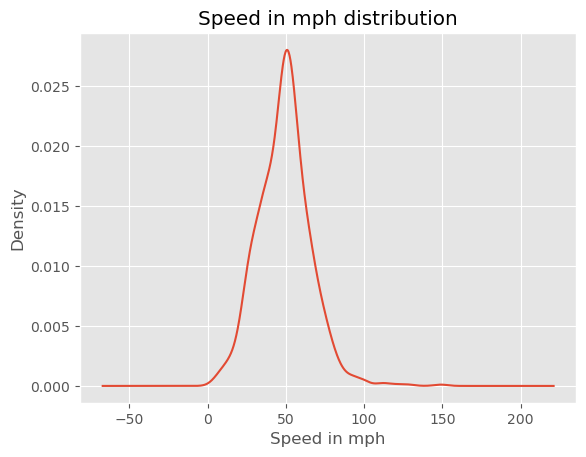

In [249]:
df['Speed_mph'].plot(kind='kde')
plt.title('Speed in mph distribution')
plt.xlabel('Speed in mph')
plt.ylabel('Density')
plt.show()

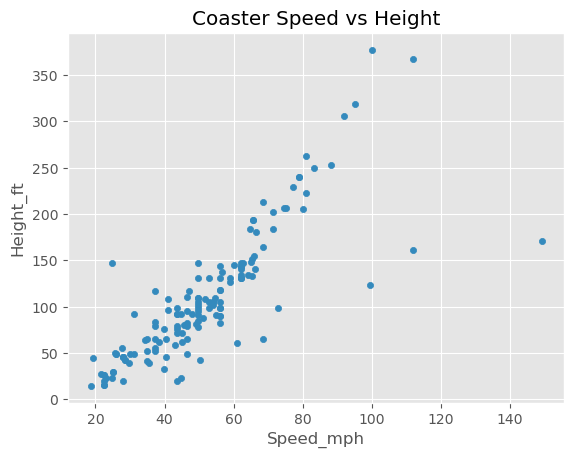

In [257]:
df.plot(kind='scatter',x='Speed_mph',y='Height_ft')
plt.title('Coaster Speed vs Height')
plt.show()

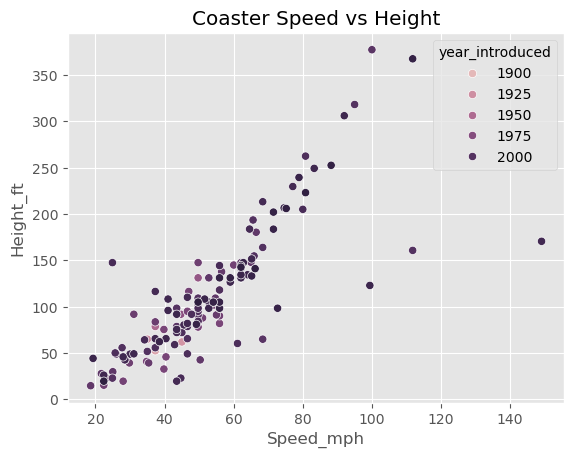

In [271]:
sns.scatterplot(df,x='Speed_mph',y='Height_ft',hue='year_introduced')
plt.title('Coaster Speed vs Height')
plt.show()

In [269]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Opened',
       'year_introduced', 'latitude', 'longitude', 'Type_Main', 'opening_date',
       'Speed_mph', 'Height_ft', 'Inversions', 'Gforce'],
      dtype='object')

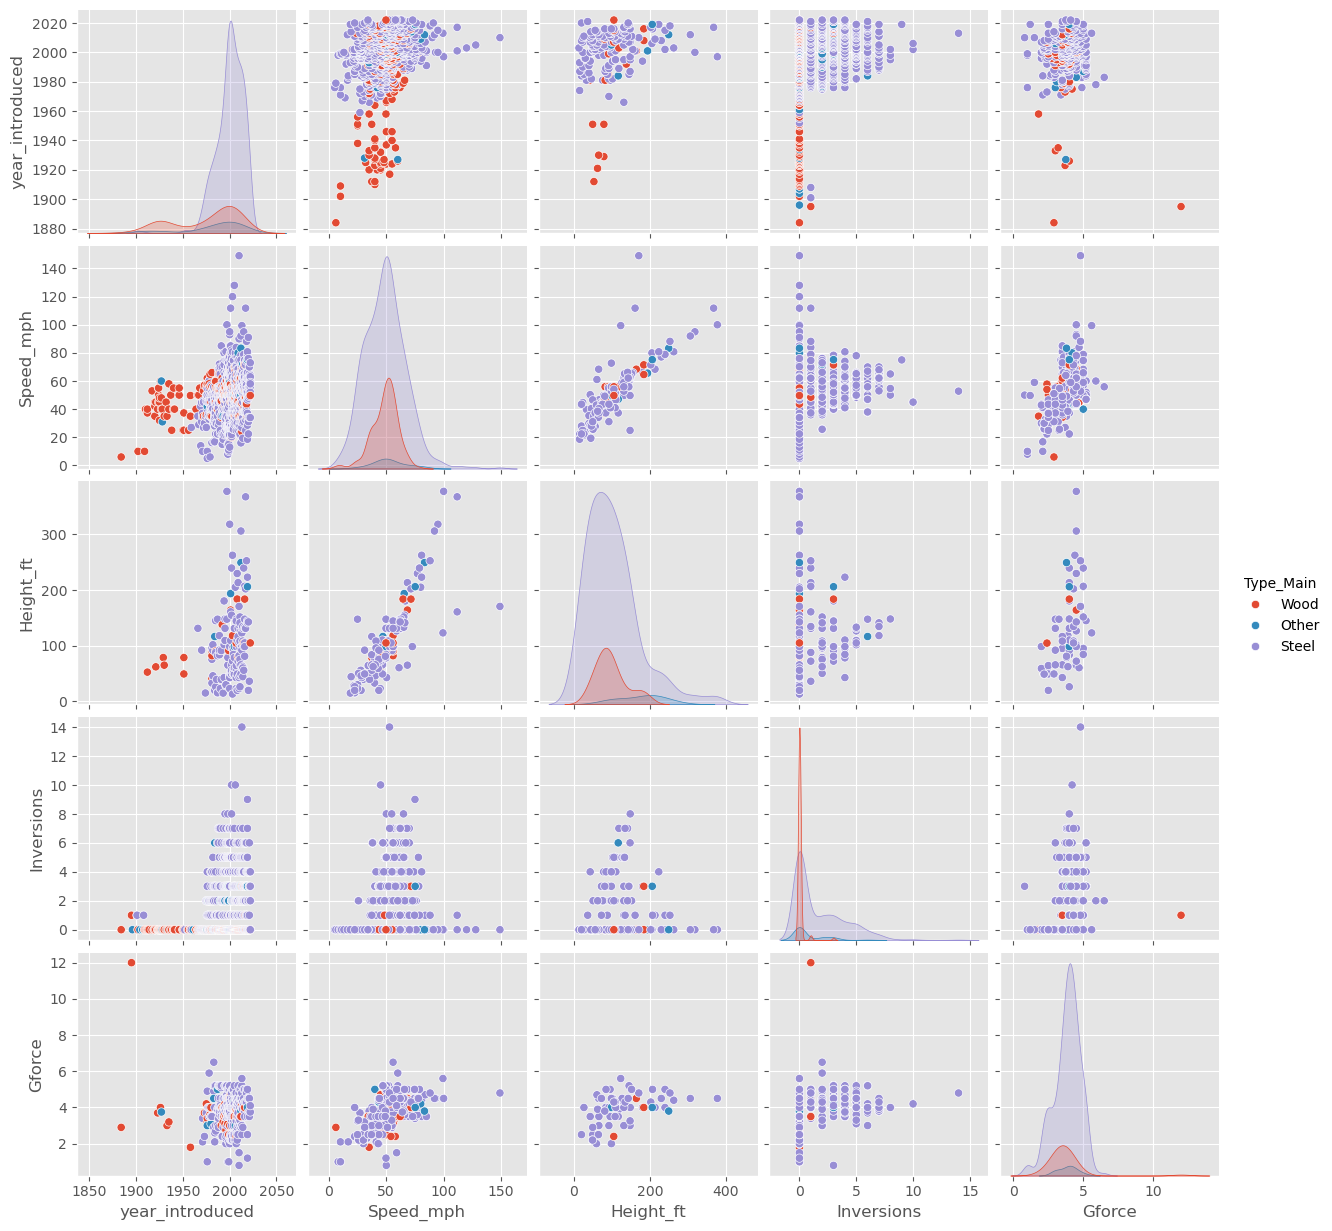

In [274]:
sns.pairplot(df,vars=['year_introduced','Speed_mph','Height_ft','Inversions','Gforce'],hue='Type_Main')
plt.show()

In [286]:
df_corr=df[['year_introduced','Speed_mph','Height_ft','Inversions','Gforce']].dropna().corr()
df_corr

,year_introduced,Speed_mph,Height_ft,Inversions,Gforce
year_introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


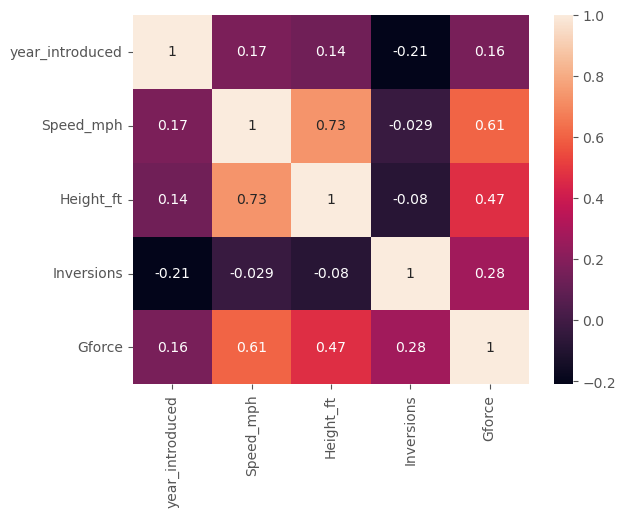

In [292]:
sns.heatmap(df_corr,annot=True)
plt.show()

In [294]:
#What are the locations with the fastest roller coasters (min of 10 coasters)

In [320]:
df_new=df[(df['Location']!='Other')]

In [332]:
df_new.groupby('Location')['Speed_mph'].agg(['mean','count']).query('count>=10').sort_values('mean',ascending=False)

,mean,count
Location,,
Busch Gardens Williamsburg,58.318182,11
Cedar Point,57.833333,18
Six Flags Magic Mountain,57.241176,17
Canada's Wonderland,53.533333,12
Six Flags Great Adventure,53.036364,11
Kings Dominion,52.083333,12
Hersheypark,50.576923,13
Kings Island,49.273684,19
Carowinds,43.571429,14


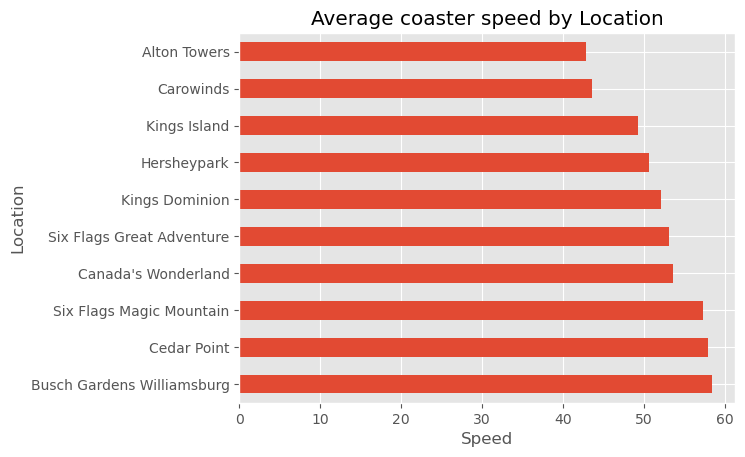

In [340]:
df_new.groupby('Location')['Speed_mph'].agg(['mean','count']).query('count>=10').sort_values('mean',ascending=False)['mean'].plot(kind='barh')
plt.title('Average coaster speed by Location')
plt.xlabel('Speed')
plt.show()